# **Chapter 14**  
**┗ 상권분석**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「상권 분석 데이터 이해」
* 🥈Session 2 - 「주소 기반 상권 분석」
* 🥇Session 3 - 「신규 진입 상권 탐색」


In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter14')
# '/content/drive/MyDrive/Colab Notebooks/ ← 여기 경로까지는 본인의 경로 입력, part3_lecture_fastcampus/chapter14' ← 변경X
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter14'

## **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🗺🥪 (매장관리자,  상권분석가)

```
A브랜드는 꽤 잘나가는 체인점을 운영하고 있다. 이번에 거금을 들여 신규점포 출점을 기획하고 있다.  
대부분의 상권에는 다른 점포들이 입점해 있기 때문에 최대한 상권이 겹치지 않는 곳을 후보지로 선정하려고 한다.

```  

> **데이터 살펴보기**

* 미국 Subway 위치 정보 데이터
* 데이터 명세 ⬇

|name|street_address|city|state|zip_code|country|latitude|longitude|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|상호명|거리주소|도시|주|우편번호|나라|위도|경도|


In [2]:
# ▶ Data read
import pandas as pd 
df = pd.read_csv('chapter14_market_analysis.csv')
df.head(2)

,name,url,street_address,city,state,zip_code,country,phone_number_1,phone_number_2,fax_1,...,email_2,website,open_hours,latitude,longitude,facebook,twitter,instagram,pinterest,youtube
0,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"1800 Duke St, Ste 100",Alexandria,VA,22314,USA,NaN,NaN,NaN,...,NaN,NaN,"Monday 7:00 AM - 7:00 PM, Tuesday 7:00 AM - 7:...",38.8043,-77.0611,NaN,NaN,NaN,NaN,NaN
1,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"1512 King St,",Alexandria,VA,22301,USA,NaN,NaN,NaN,...,NaN,NaN,"Sunday 9:00 AM - 8:00 PM, Monday 7:00 AM - 9:0...",38.8062,-77.0565,NaN,NaN,NaN,NaN,NaN



## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 핵심점포 입점 지역 불분명
```  

> **기대효과**

```
▶ 핵심점포 입점 지역 확정
```

> **해결방안**

```
▶ 상권 분석을 통한 입지 선정
▶ Session 1 🥉
 - Data 전처리 및 상권 Data(위도, 경도) 이해
▶ Session 2 🥈
 - 밀집도 분석(State, City)
▶ Session 3 🥇
 - 가설 수립 후 상권 전략 기획
```

> **성과측정**  

```
▶ 입점 후 매출 모니터링
```

> **현업적용**  

```
▶ 핵심고객 및 핵심상권 정의
▶ 핵심상권의 소비형태 파악
▶ 경쟁사 분석 (※ 경쟁사 대비 강점/약점)
▶ 입점 후 전략 기획 
```

> **주요 코드 미리 살펴보기**  

```
▶ session 1 → folium.Map(location=[,]), MarkerCluster()
▶ session 2 → plt.bar, reset_index(), pd.merge()
▶ session 3 → str.contains()
```


## **🥉Session 1**  
**┗ 상권 분석 데이터 이해**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인 

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  


In [3]:
# ▶ Data 형태 확인
# ▶ 25,533 row, 22 col로 구성됨
print('df', df.shape)

df (25533, 22)


In [4]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25533 entries, 0 to 25532
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            25533 non-null  object 
 1   url             24017 non-null  object 
 2   street_address  25533 non-null  object 
 3   city            25533 non-null  object 
 4   state           25533 non-null  object 
 5   zip_code        25533 non-null  object 
 6   country         25533 non-null  object 
 7   phone_number_1  0 non-null      float64
 8   phone_number_2  0 non-null      float64
 9   fax_1           0 non-null      float64
 10  fax_2           0 non-null      float64
 11  email_1         0 non-null      float64
 12  email_2         0 non-null      float64
 13  website         0 non-null      float64
 14  open_hours      25395 non-null  object 
 15  latitude        25533 non-null  float64
 16  longitude       25533 non-null  float64
 17  facebook        0 non-null     

In [5]:
# ▶ Null 값 확인
print(df.isnull().sum())

name                  0
url                1516
street_address        0
city                  0
state                 0
zip_code              0
country               0
phone_number_1    25533
phone_number_2    25533
fax_1             25533
fax_2             25533
email_1           25533
email_2           25533
website           25533
open_hours          138
latitude              0
longitude             0
facebook          25533
twitter           25533
instagram         25533
pinterest         25533
youtube           25533
dtype: int64


### · 상권 분석 Data 
---


In [6]:
# ▶ 필요한 데이터만 추출
df=df[['name', 'street_address','city','state', 'zip_code', 'country', 'latitude', 'longitude']]
df.head(5)

,name,street_address,city,state,zip_code,country,latitude,longitude
0,Subway,"1800 Duke St, Ste 100",Alexandria,VA,22314,USA,38.8043,-77.0611
1,Subway,"1512 King St,",Alexandria,VA,22301,USA,38.8062,-77.0565
2,Subway,"2361 Eisenhower Ave,",Alexandria,VA,22314,USA,38.8012,-77.0691
3,Subway,"320 King Street, 1st Floor",Alexandria,VA,22314,USA,38.8045,-77.0433
4,Subway,"5836 N. Kings Hwy, Suite A, Huntington Station",Alexandria,VA,22303,USA,38.7903,-77.0769


In [7]:
# ▶ Null 값 확인
df.isnull().sum()

name              0
street_address    0
city              0
state             0
zip_code          0
country           0
latitude          0
longitude         0
dtype: int64

In [8]:
# ▶ 총 도시 수 확인(7,286)
df['city'].value_counts()

Houston         232
Chicago         168
San Antonio     134
Los Angeles     129
Las Vegas       123
               ... 
Onsted            1
Horton            1
Spring Arbor      1
Morenci           1
Forks             1
Name: city, Length: 7286, dtype: int64

In [9]:
# ▶ 총 주(State) 수 확인(52)
len(df['state'].value_counts())

52

In [10]:
df.head(1)

,name,street_address,city,state,zip_code,country,latitude,longitude
0,Subway,"1800 Duke St, Ste 100",Alexandria,VA,22314,USA,38.8043,-77.0611


In [11]:
# ▶ 위도, 경도 활용 특정 좌표 Mapping (City - Alecandria)
import folium
m = folium.Map(location=[38.8043, -77.0611], zoom_start=12)
m

In [12]:
# ▶ 특정 도시에 있는 모든 점포 Market 표시하기
df_city = df[df['city']=='Houston']
df_city.head(5)

,name,street_address,city,state,zip_code,country,latitude,longitude
11979,Subway,"686 N Jackson St,",Houston,MS,38851,USA,33.9048,-89.0011
15519,Subway,"801 S. Sam Houston Blvd.,",Houston,MO,65483,USA,37.3200,-91.9592
21022,Subway,"3040 FM 1960 E, Ste 152, Cypress Landing S/C",Houston,TX,77073,USA,30.0201,-95.3808
21027,Subway,"17225 Crosby Hwy, Shell Truck Stop",Houston,TX,77049,USA,29.8523,-95.1277
21072,Subway,"14455 Cullen Blvd, #104, Cullen Shopping Center",Houston,TX,77047,USA,29.5978,-95.3524


In [13]:
# ▶ 특정 도시에 있는 모든 점포 Market 표시하기

m = folium.Map(location=[29.5978, -95.3524], zoom_start=12)

for i in df_city.index:
    sub_lat =  df_city.loc[i,'latitude']
    sub_long = df_city.loc[i,'longitude']
    
    title = df_city.loc[i,'street_address']
    
    # ▶ 지도에 데이터 찍어서 보여주기
    folium.Marker([sub_lat,sub_long],tooltip = title).add_to(m)

# ▶ 한글이 안나오는 오류로 html로 trouble shooting 
# ▶ m.save('example.html')
m

In [14]:
from folium import Marker
from folium.plugins import MarkerCluster

# ▶ Base map 설정
m = folium.Map(location=[29.5978, -95.3524], tiles='openstreetmap', zoom_start=11)

# ▶Marker cluster (위도, 경도, 제목)
mc = MarkerCluster()
for _, row in df_city.iterrows():
    mc.add_child(    
        Marker(location = [row['latitude'], row['longitude']],
               popup=row['street_address']
              )
    )
    
m.add_child(mc)

# ▶ Display the map
m

## **🥈Session 2**  
**┗ 주소 기반 상권 분석**  
---


### · 밀집도 분석(State) 
---


In [ ]:
df.head(5)

,name,street_address,city,state,zip_code,country,latitude,longitude
0,Subway,"1800 Duke St, Ste 100",Alexandria,VA,22314,USA,38.8043,-77.0611
1,Subway,"1512 King St,",Alexandria,VA,22301,USA,38.8062,-77.0565
2,Subway,"2361 Eisenhower Ave,",Alexandria,VA,22314,USA,38.8012,-77.0691
3,Subway,"320 King Street, 1st Floor",Alexandria,VA,22314,USA,38.8045,-77.0433
4,Subway,"5836 N. Kings Hwy, Suite A, Huntington Station",Alexandria,VA,22303,USA,38.7903,-77.0769


In [15]:
# ▶ 밀집도(State), 총 점포수 대비 각 주(State)에 있는 점포수의 밀집도 분석
df_density = pd.DataFrame(df.groupby('state')['street_address'].count())
df_density['total'] = df_density['street_address'].sum()
df_density['density'] = round((df_density['street_address'] / df_density['total']) * 100,1)
df_density.head(5)

,street_address,total,density
state,,,
AK,63,25533,0.2
AL,456,25533,1.8
AR,283,25533,1.1
AZ,453,25533,1.8
CA,2590,25533,10.1


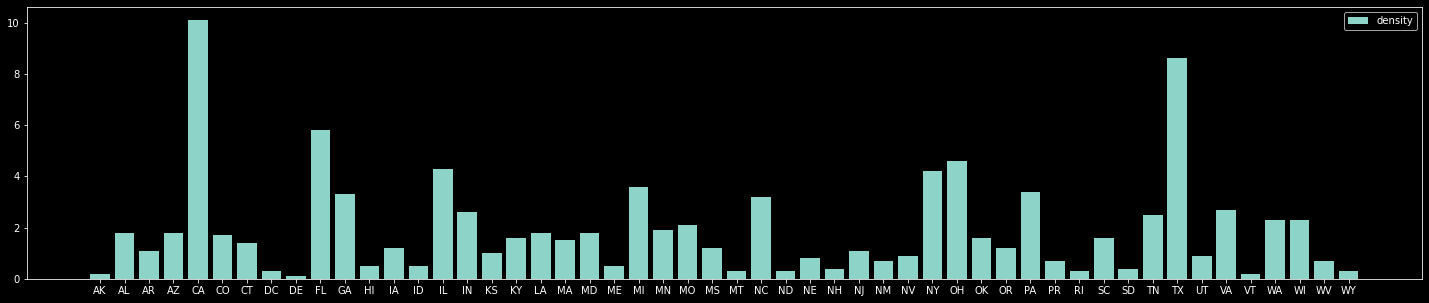

In [16]:
# ▶ 52개 주(State)별 밀집도 표현 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

plt.bar(df_density.index, df_density['density'], label='density');
plt.legend();
plt.gcf().set_size_inches(25, 5);

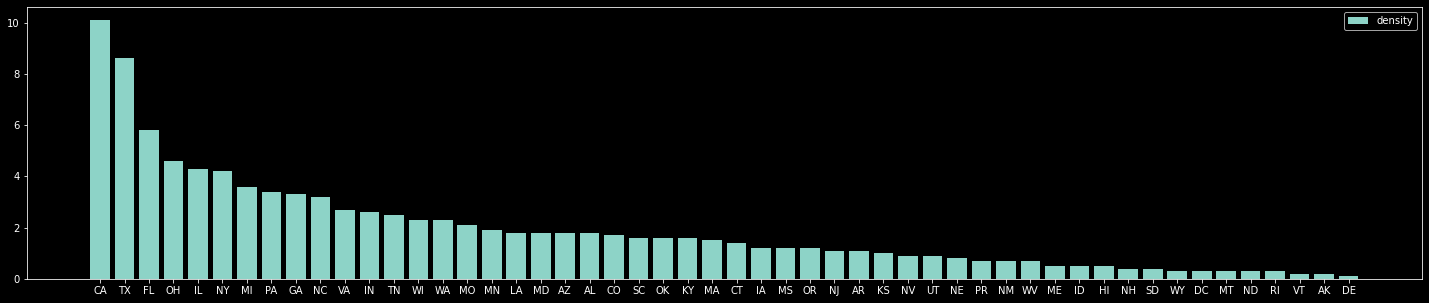

In [18]:
# ▶ 52개 주(State)별 밀집도 표현, 내림차순 정렬
# ▶ CA(캘리포니아), ..., DE(델라웨어)
df_density = df_density.sort_values(by=['density'], ascending=False)
plt.bar(df_density.index, df_density['density'], label='density');
plt.legend();
plt.gcf().set_size_inches(25, 5);

In [19]:
# ▶ 밀집도가 가장 낮은 DE(델라웨어)주 mapping
from folium import Marker
from folium.plugins import MarkerCluster

df_DE = df[df['state']=='DE']

# ▶ Draw a basemap
m = folium.Map(location=[list(df_DE['latitude'])[0], list(df_DE['longitude'])[0]], tiles='openstreetmap', zoom_start=11)

# ▶ Add  points to the map
mc = MarkerCluster()
for _, row in df_DE.iterrows():
    mc.add_child(    
        Marker(location = [row['latitude'], row['longitude']],
               popup=row['street_address']
              )
    )
    
m.add_child(mc)

# ▶ Display the map
m

### · 밀집도 분석(City) 
---





In [ ]:
df.head(5)

,name,street_address,city,state,zip_code,country,latitude,longitude
0,Subway,"1800 Duke St, Ste 100",Alexandria,VA,22314,USA,38.8043,-77.0611
1,Subway,"1512 King St,",Alexandria,VA,22301,USA,38.8062,-77.0565
2,Subway,"2361 Eisenhower Ave,",Alexandria,VA,22314,USA,38.8012,-77.0691
3,Subway,"320 King Street, 1st Floor",Alexandria,VA,22314,USA,38.8045,-77.0433
4,Subway,"5836 N. Kings Hwy, Suite A, Huntington Station",Alexandria,VA,22303,USA,38.7903,-77.0769


In [20]:
# ▶ 밀집도(City), 총 점포수 대비 각 주(State)에 있는 점포수의 밀집도 분석
df_density_city = pd.DataFrame(df.groupby(['state', 'city'])['street_address'].count()).reset_index()
df_density_city.columns=['state', 'city', 'cnt_city']
df_density_city.head(5)

,state,city,cnt_city
0,AK,Anchorage,22
1,AK,Barrow,1
2,AK,Bethel,1
3,AK,Denali Park,1
4,AK,Dillingham,1


In [21]:
# ▶ 전체 점포 수 대비 밀집도가 아닌, 각 주(State)에 점포수 대비 밀집도를 계산
df_density_state = pd.DataFrame(df.groupby(['state'])['street_address'].count()).reset_index()
df_density_state.columns = ['state', 'cnt_state']
df_density_state.head(5)

,state,cnt_state
0,AK,63
1,AL,456
2,AR,283
3,AZ,453
4,CA,2590


In [22]:
# ▶ 전체 점포 수 대비 밀집도가 아닌, 각 주(State)에 점포수 대비 밀집도를 계산 (※ 상위에서 구한 주별 점포 수를 left join)
df_merge = pd.merge(df_density_city, df_density_state, how='left', on='state')
df_merge['density'] = (df_merge['cnt_city'] / df_merge['cnt_state']) * 100
df_merge = df_merge.sort_values(by=['density'], ascending=False)
df_merge.head(10)

,state,city,cnt_city,cnt_state,density
1376,DC,Washington,65,69,94.202899
6008,NV,Las Vegas,120,218,55.045872
2074,HI,Honolulu,44,115,38.260870
0,AK,Anchorage,22,63,34.920635
5935,NM,Albuquerque,50,176,28.409091
5642,NE,Omaha,44,206,21.359223
440,AZ,Phoenix,90,453,19.867550
8044,SD,Sioux Falls,19,98,19.387755
3812,MD,Baltimore,85,471,18.046709
5555,ND,Fargo,12,67,17.910448


In [23]:
df_merge.tail(5)

,state,city,cnt_city,cnt_state,density
987,CA,Sierra Madre,1,2590,0.03861
990,CA,Solana Beach,1,2590,0.03861
991,CA,Soledad,1,2590,0.03861
992,CA,Solvang,1,2590,0.03861
629,CA,Earlimart,1,2590,0.03861


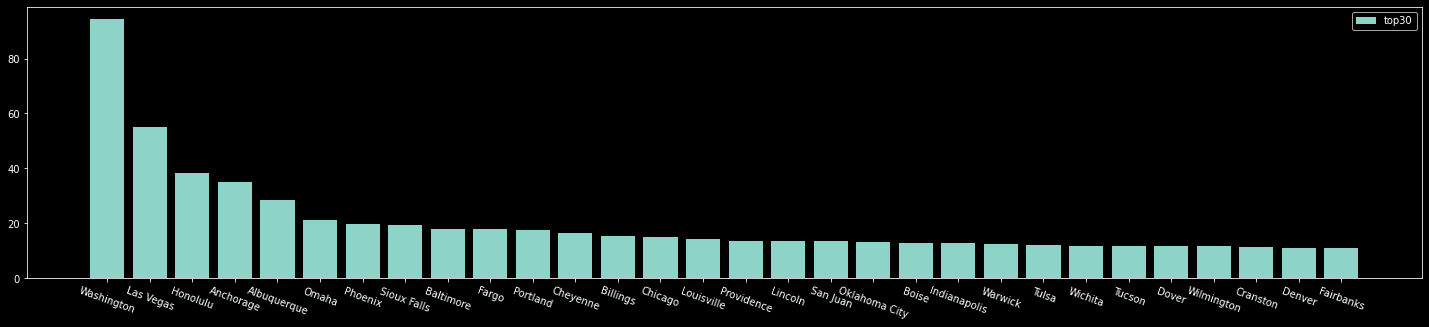

In [24]:
# ▶ 도시(City) 밀집도 기준, Top 30 
# ▶ Washington, Las Vegas 순으로 도시 밀집도가 높음 
df_merge_30h = df_merge.head(30)
plt.bar(df_merge_30h['city'], df_merge_30h['density'], label='top30');
plt.xticks(rotation=-20)
plt.legend()
plt.gcf().set_size_inches(25, 5);

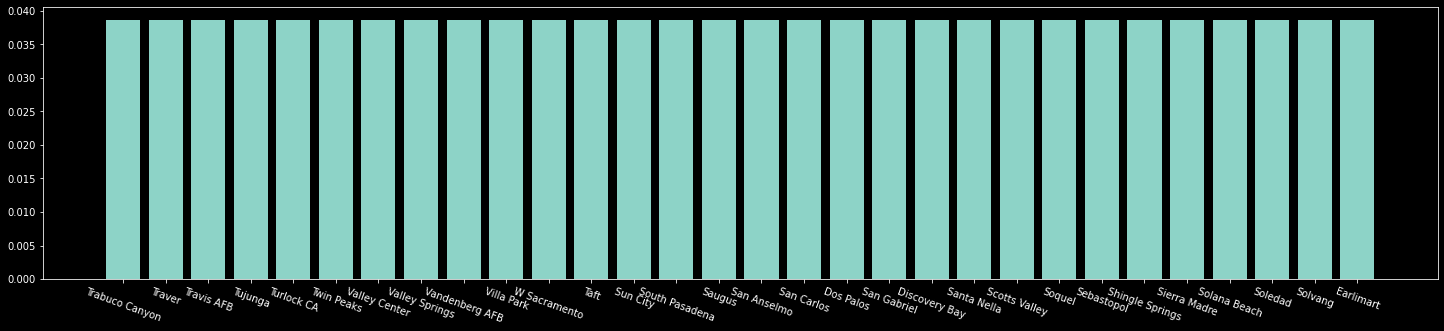

In [25]:
# ▶ 도시(City) 밀집도 기준, Tail 30 
# ▶ 후순위 도시들은 밀집도에 큰 차이가 없음
df_merge_30t = df_merge.tail(30)
plt.bar(df_merge_30t['city'], df_merge_30t['density'], label='tail30');
plt.xticks(rotation=-20)
plt.gcf().set_size_inches(25, 5);

In [26]:
# ▶ 밀집도가 가장 낮은 DE(델라웨어)주 mapping
from folium import Marker
from folium.plugins import MarkerCluster

df_DE = df[df['city']=='Sierra Madre']

# ▶ Draw a basemap
m = folium.Map(location=[list(df_DE['latitude'])[0], list(df_DE['longitude'])[0]], tiles='openstreetmap', zoom_start=11)

# ▶ Add  points to the map
mc = MarkerCluster()
for _, row in df_DE.iterrows():
    mc.add_child(    
        Marker(location = [row['latitude'], row['longitude']],
               popup=row['street_address']
              )
    )
    
m.add_child(mc)

# ▶ Display the map
m

## **🥇Session 3**  
**┗ 신규 진입 상권 탐색**  
---

### · 상권 전략 기획(1)
---
* 주(State) 밀집도가 높다는 건 그 만큼 소비할 수 있는 인구수가 많다는 얘기
* 주(State) 밀집도가 높으면서, 도시(City) 밀집도가 낮은 지역을 목표


In [27]:
# ▶ 기존 산출했던 주(State) 밀집도
df_density.columns = ['cnt_state', 'total', 'density_state']
df_density = df_density.reset_index()
df_density.head(5)

,state,cnt_state,total,density_state
0,CA,2590,25533,10.1
1,TX,2194,25533,8.6
2,FL,1490,25533,5.8
3,OH,1171,25533,4.6
4,IL,1110,25533,4.3


In [28]:
# ▶ state 밀집도만 가져오기
df_density = df_density[['state', 'density_state']]
df_density.head(5)

,state,density_state
0,CA,10.1
1,TX,8.6
2,FL,5.8
3,OH,4.6
4,IL,4.3


In [29]:
# ▶ 도시 밀집도 데이터 재정비
df_merge.columns = ['state', 'city', 'cnt_city', 'cnt_state', 'density_city']
df_merge = df_merge.reset_index(drop=True)
df_merge.head(5)

,state,city,cnt_city,cnt_state,density_city
0,DC,Washington,65,69,94.202899
1,NV,Las Vegas,120,218,55.045872
2,HI,Honolulu,44,115,38.260870
3,AK,Anchorage,22,63,34.920635
4,NM,Albuquerque,50,176,28.409091


In [30]:
# ▶ 도시(City) 밀집도 데이터 < 주(Staet) 밀집도 left join
df_merge = pd.merge(df_merge, df_density, how='left', on='state')
df_merge.head(5)

,state,city,cnt_city,cnt_state,density_city,density_state
0,DC,Washington,65,69,94.202899,0.3
1,NV,Las Vegas,120,218,55.045872,0.9
2,HI,Honolulu,44,115,38.260870,0.5
3,AK,Anchorage,22,63,34.920635,0.2
4,NM,Albuquerque,50,176,28.409091,0.7


In [31]:
# ▶ 전략 기획에서 정의한, 주 밀집도는 높으면서 도시 밀집도는 낮은 지역 탐색
df_merge.sort_values(by=['density_state', 'density_city'], ascending = [False, True]).head(10)

,state,city,cnt_city,cnt_state,density_city,density_state
9701,CA,Monrovia,1,2590,0.03861,10.1
9702,CA,Mount Shasta,1,2590,0.03861,10.1
9703,CA,Marin City,1,2590,0.03861,10.1
9704,CA,Oak Park,1,2590,0.03861,10.1
9705,CA,Maricopa,1,2590,0.03861,10.1
9706,CA,Marina,1,2590,0.03861,10.1
9707,CA,Mammoth Lakes,1,2590,0.03861,10.1
9708,CA,Morro Bay,1,2590,0.03861,10.1
9709,CA,Montrose,1,2590,0.03861,10.1
9710,CA,Mojave,1,2590,0.03861,10.1


In [32]:
# ▶ 1순위 후보 지역
df[(df['state']=='CA') & (df['city']=='Monrovia')]

,name,street_address,city,state,zip_code,country,latitude,longitude
8535,Subway,"119 W. Foothill Blvd, #B, Foothill Center",Monrovia,CA,91016,USA,34.1515,-118.0018


In [33]:
from folium import Marker
from folium.plugins import MarkerCluster

df_DE = df[df['state']=='CA']

# ▶ Draw a basemap
m = folium.Map(location=[34.1515, -118.0018], tiles='openstreetmap', zoom_start=11)

# ▶ Add  points to the map
mc = MarkerCluster()
for _, row in df_DE.iterrows():
    mc.add_child(    
        Marker(location = [row['latitude'], row['longitude']],
               popup=row['street_address']
              )
    )
        
m.add_child(mc)

# ▶ 1순위 후보지역 Circle Marker 추가 
folium.CircleMarker(
  [34.1515, -118.0018],
  radius=100,
  color='#ffffgg',
  fill_color='#fffggg',
  popup='New_in'
).add_to(m)

# ▶ Display the map
m

Output hidden; open in https://colab.research.google.com to view.

### · 상권 전략 기획(2)
---
* Hwy(Highway) 타겟으로 고속도로에 밀집도가 낮은 지역을 후보지로 탐색


In [34]:
df.head(10)

,name,street_address,city,state,zip_code,country,latitude,longitude
0,Subway,"1800 Duke St, Ste 100",Alexandria,VA,22314,USA,38.8043,-77.0611
1,Subway,"1512 King St,",Alexandria,VA,22301,USA,38.8062,-77.0565
2,Subway,"2361 Eisenhower Ave,",Alexandria,VA,22314,USA,38.8012,-77.0691
3,Subway,"320 King Street, 1st Floor",Alexandria,VA,22314,USA,38.8045,-77.0433
4,Subway,"5836 N. Kings Hwy, Suite A, Huntington Station",Alexandria,VA,22303,USA,38.7903,-77.0769
5,Subway,"101 Independence Ave S. E., Library of Congress",Washington,DC,20540,USA,38.8871,-77.0041
6,Subway,"Rayburn Bldg., 45 Independence Ave. SW, US Hou...",Washington,DC,20515,USA,38.8870,-77.0106
7,Subway,"430 8th St SE,",Washington,DC,20003,USA,38.8829,-76.9946
8,Subway,"1100 New Jersey Ave SE, 1st Floor, Federal Gat...",Washington,DC,20003,USA,38.8770,-77.0037
9,Subway,"50 Massachusetts Ave NE, Union Station",Washington,DC,20002,USA,38.8971,-77.0064


In [35]:
# ▶ 주소지 기준 Hwy가 포함된 데이터만 Filter
df_hwy = df[df['street_address'].str.contains('Hwy')]
df_hwy.head(10)

,name,street_address,city,state,zip_code,country,latitude,longitude
4,Subway,"5836 N. Kings Hwy, Suite A, Huntington Station",Alexandria,VA,22303,USA,38.7903,-77.0769
17,Subway,"3825 Jefferson Davis Hwy, Ste B, Potomac Yard ...",Alexandria,VA,22305,USA,38.8389,-77.0516
29,Subway,"30182 Sussex Hwy, Unit 2, Laurel Crossings",Laurel,DE,19956,USA,38.5756,-75.5666
30,Subway,"301 W Stein Hwy,",Seaford,DE,19973,USA,38.6460,-75.6213
33,Subway,"8600 Ocean Hwy, Ste 4, Tiger Mart",Delmar,MD,21875,USA,38.4292,-75.5651
48,Subway,"16819 S. DuPont Hwy., Suite 100, Mattlind Squa...",Harrington,DE,19952,USA,38.9289,-75.5662
49,Subway,"11425 S.Dupont Hwy, N Rt 13 & Rt 12, Felton Go...",Felton,DE,19943,USA,39.0076,-75.5687
50,Subway,"905 N Dupont Hwy, Ste 101",Milford,DE,19963,USA,38.9279,-75.4332
51,Subway,"5502 S Dupont Hwy, Ste 3",Dover,DE,19901,USA,39.0727,-75.5533
62,Subway,"1200 Dupont Hwy, MLK Jr Student Center, Delawa...",Dover,DE,19901,USA,39.1884,-75.5400


In [36]:
# ▶ 주(State) 기준으로 고속도로에 가장 적은 매장을 가지고 있는 주(State) 탐색
pd.DataFrame(df_hwy.groupby('state')['street_address'].count()).reset_index().sort_values(by=['street_address'], ascending=True).head(10)

,state,street_address
20,ME,1
38,RI,3
27,ND,4
47,WV,4
18,MA,4
48,WY,5
30,NJ,7
6,CT,7
43,UT,8
40,SD,8


In [37]:
df_hwy[df_hwy['state']=='ME']

,name,street_address,city,state,zip_code,country,latitude,longitude
816,Subway,"1560 Atlantic Hwy,",Waldoboro,ME,04572-9801,USA,44.0964,-69.3736


In [38]:
from folium import Marker
from folium.plugins import MarkerCluster

df_DE = df[df['state']=='ME']

# ▶ Draw a basemap
m = folium.Map(location=[list(df_DE['latitude'])[0], list(df_DE['longitude'])[0]], tiles='openstreetmap', zoom_start=11)

# ▶ Add  points to the map
mc = MarkerCluster()
for _, row in df_DE.iterrows():
    mc.add_child(    
        Marker(location = [row['latitude'], row['longitude']],
               popup=row['street_address']
              )
    )
    
m.add_child(mc)

# ▶ 1순위 후보지 Circle Marker 추가
folium.CircleMarker(
  [44.0964, -69.3736],
  radius=100,
  color='#ffffgg',
  fill_color='#fffggg',
  popup='New_in'
).add_to(m)

# ▶ Display the map
m